### [목표]
- 년도별 서울시 인구 현홯(내국인/외국인/고령자)
- 년도별 외궁인 남/여 비율

In [46]:
# 구분자가 콤마(.)가 아닌 다른 구분자(탭키:\t)를 사용한 데이터 읽어오기
# 제목행 선택: header=1
import pandas as pd

df1=pd.read_csv('./data/서울시 인구현황_구.txt', sep="\t", header=1)
df1.head()

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…
4,1991,용산구,"96,696","294,341","147,914","146,427",…,…,…,…,…,…,"13,460",21.87,3.04,…


In [47]:
df1.columns

Index(['기간', '자치구', '세대', '합계', '합계.1', '합계.2', '한국인', '한국인.1', '한국인.2',
       '등록외국인', '등록외국인.1', '등록외국인.2', '인구밀도', '인구밀도.1', '세대당인구', '65세이상고령자'],
      dtype='object')

In [48]:
# 기간, 자치구, 전체인구/전체(남)/전체(여)/내국인/내국인(남)/내국인(여)/외궁인/외국인(남)/외국인(여)/65세이상
df1[['기간', '자치구', '합계' ,'합계.1', '합계.2','한국인', '한국인.1', '한국인.2','등록외국인', '등록외국인.1', '등록외국인.2','65세이상고령자']]
df1.loc[:,['기간', '자치구', '합계' ,'합계.1', '합계.2','한국인', '한국인.1', '한국인.2','등록외국인', '등록외국인.1', '등록외국인.2','65세이상고령자']]
df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,-1]]
df1=df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,-1]]


In [49]:
df1.drop(0, inplace=True) #asis=0 생략

In [45]:
df1.head()

,기간,자치구,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,65세이상고령자,65세이상고령자
1,1991,합계,"5,485,353","5,419,174",…,…,…,…,…,…,…,…
2,1991,종로구,"119,127","117,679",…,…,…,…,…,…,…,…
3,1991,중구,"93,312","90,830",…,…,…,…,…,…,…,…
4,1991,용산구,"147,914","146,427",…,…,…,…,…,…,…,…
5,1991,성동구,"401,375","387,639",…,…,…,…,…,…,…,…


### 열이름 변경
- df.rename(columns={'합계':'총인구', '합계.1:'총인구(남)',......}) #전체 열이름 일부변경
- df.rename(columns={df1,columns[2]:'총인구', 'df1.columns[2]:'총인구(남)',......}) # 열 이름을 많이 변경

In [55]:
df1=df1.rename(columns={'합계':'총인구', '한국인':'내국인', '등록외국인': '외국인'})
df1.head(3)

,기간,자치구,총인구,합계.1,합계.2,내국인,한국인.1,한국인.2,외국인,등록외국인.1,등록외국인.2,65세이상고령자
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…


In [61]:
#df1.rename(columns={df1.columns[0]:"년도"} ,
#           columns={df1.columns[1]:"자치구"
 #          columns={df1.columns[2]:"총인구"
  #         columns={df1.columns[3]:"총인구(남)"
   #        columns={df1.columns[4]:"총인구(여)",............}
           
           
           
    #       .inplace=True)

SyntaxError: invalid syntax (<ipython-input-61-3635a2185c7e>, line 1)

In [60]:
col_name=['년도','자치구','총인구','총인구(남)','총인구(여)','내국인','내국인(남)',' 내국인(여)','외국인','외국인(남)','외국인(여)','65세이상']

for i in range(len(col_name)):
    df1=df1.rename(columns={df1.columns[i]:col_name[i]})
    
df1.head(3)

,년도,자치구,총인구,총인구(남),총인구(여),내국인,내국인(남),내국인(여),외국인,외국인(남),외국인(여),65세이상
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…


### 년도별 총인구(남)/총인구(여) 값을 나타내는 그래프 작성

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년도       768 non-null    object
 1   자치구      768 non-null    object
 2   총인구      768 non-null    object
 3   총인구(남)   768 non-null    object
 4   총인구(여)   768 non-null    object
 5   내국인      768 non-null    object
 6   내국인(남)   768 non-null    object
 7    내국인(여)  768 non-null    object
 8   외국인      768 non-null    object
 9   외국인(남)   768 non-null    object
 10  외국인(여)   768 non-null    object
 11  65세이상    768 non-null    object
dtypes: object(12)
memory usage: 78.0+ KB


In [65]:
df2=df1.iloc[:, 0:5]
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      768 non-null    object
 1   자치구     768 non-null    object
 2   총인구     768 non-null    object
 3   총인구(남)  768 non-null    object
 4   총인구(여)  768 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


###  DataFrame 데이터 타입 변경하는 방법

In [79]:
#pandas에서 데이터형을 원하는 데이터형으로 변경: astype() 함수

df2['총인구']=df2['총인구'].str.replace(',',"")
df2['총인구(남)']=df2['총인구(남)'].str.replace(',',"")
df2['총인구(여)']=df2['총인구(여)'].str.replace(',',"")
df2.dtypes

<ipython-input-79-3ca365141b28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['총인구']=df2['총인구'].str.replace(',',"")
<ipython-input-79-3ca365141b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['총인구(남)']=df2['총인구(남)'].str.replace(',',"")
<ipython-input-79-3ca365141b28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

년도        object
자치구       object
총인구       object
총인구(남)    object
총인구(여)    object
dtype: object

In [82]:
df2=df2.astype({'년도':int, '총인구':int, '총인구(남)':int,'총인구(여)':int})
df2.head()

,년도,자치구,총인구,총인구(남),총인구(여)
1,1991,합계,10904527,5485353,5419174
2,1991,종로구,236806,119127,117679
3,1991,중구,184142,93312,90830
4,1991,용산구,294341,147914,146427
5,1991,성동구,789014,401375,387639


조회할 구 이름 입력:합계


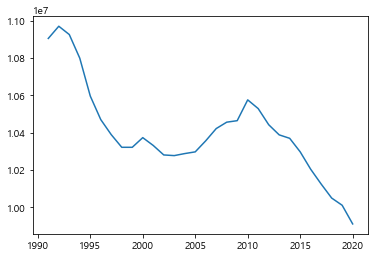

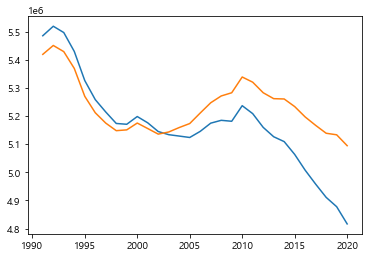

In [106]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)



gu=input('조회할 구 이름 입력:')


df3=df2[df2['자치구']==gu]
plt.plot(df3['년도'], df3['총인구'])

plt.show()
plt.plot(df3['년도'], df3['총인구(남)'])
plt.plot(df3['년도'], df3['총인구(여)'])
plt.show()

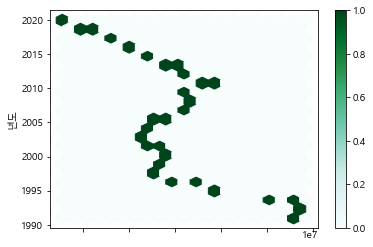

In [107]:
df3.plot(kind='hexbin', x='총인구', y='년도', gridsize=20) #산점도 그래프
plt.show()

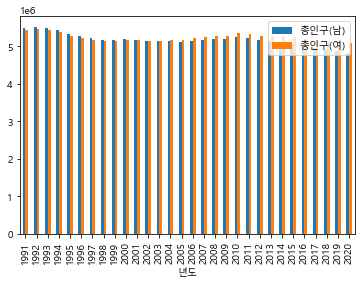

In [108]:
df3.plot(kind='bar', x='년도', y=['총인구(남)', '총인구(여)']) #산점도 그래프
plt.show()

In [109]:
df1[df1['내국인']!='…']

,년도,자치구,총인구,총인구(남),총인구(여),내국인,내국인(남),내국인(여),외국인,외국인(남),외국인(여),65세이상
24,1992,합계,10969862,5519096,5450766,"10,935,230","5,500,001","5,435,229","34,632","19,095","15,537","434,348"
25,1992,종로구,227988,114648,113340,"226,240","113,677","112,563","1,748",971,777,"12,096"
26,1992,중구,176836,89537,87299,"174,605","88,268","86,337","2,231","1,269",962,"8,857"
27,1992,용산구,287124,144600,142524,"280,671","140,424","140,247","6,453","4,176","2,277","13,957"
28,1992,성동구,780526,397121,383405,"778,385","395,977","382,408","2,141","1,144",997,"28,493"
...,...,...,...,...,...,...,...,...,...,...,...,...
764,2020,관악구,509803,255211,254592,"495,060","248,339","246,721","14,743","6,872","7,871","78,875"
765,2020,서초구,429025,205282,223743,"425,126","203,359","221,767","3,899","1,923","1,976","60,169"
766,2020,강남구,544055,260378,283677,"539,231","257,999","281,232","4,824","2,379","2,445","75,096"
767,2020,송파구,673926,325080,348846,"667,960","322,299","345,661","5,966","2,781","3,185","93,483"
